# Correlations 


1. [Correlation computation and scatterplots](#section1)
2. [Scatterplot matrix](#section2)
3. [Heatmaps](#section3)


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

We'll work with the [California Housing data](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html)



In [7]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/housing.csv'
house_df = pd.read_csv(url)
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
house_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### 1. Correlation computation and scatterplots

Is there a correlation between the income and the house value?

In [8]:
house_df[['median_income', 'median_house_value']].corr(method='pearson')

,median_income,median_house_value
median_income,1.000000,0.688075
median_house_value,0.688075,1.000000


Plot this correlation:

<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>

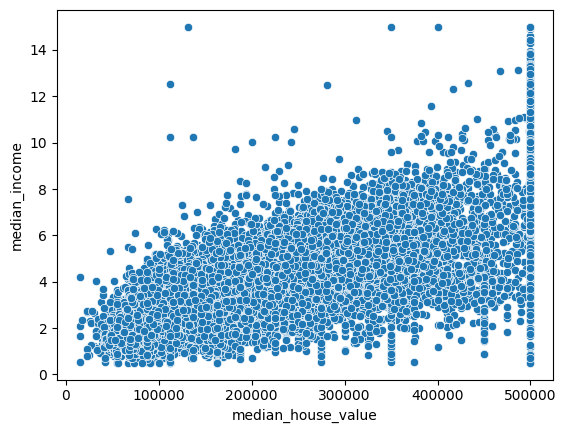

In [9]:
sns.scatterplot(data = house_df, x = 'median_house_value', y = 'median_income')

How do you perform correlation for all attributes in the dataset?

In [15]:
house_df.corr(method='pearson')

C:\Users\lihin\AppData\Local\Temp\ipykernel_9372\2948178597.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  house_df.corr(method='pearson')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<AxesSubplot: xlabel='total_bedrooms', ylabel='households'>

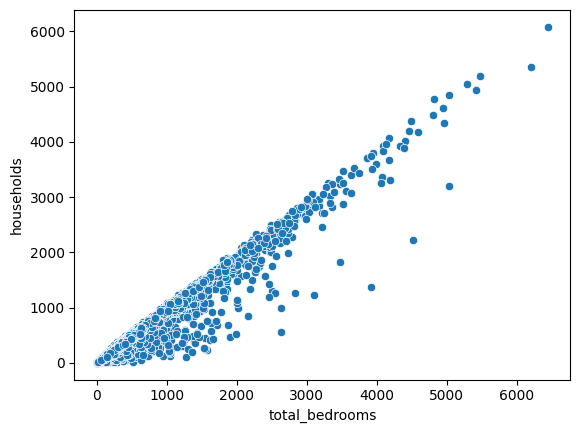

In [16]:
sns.scatterplot(data = house_df, x = 'total_bedrooms', y = 'households')

##### Almost similar - using matplotlib plt function:

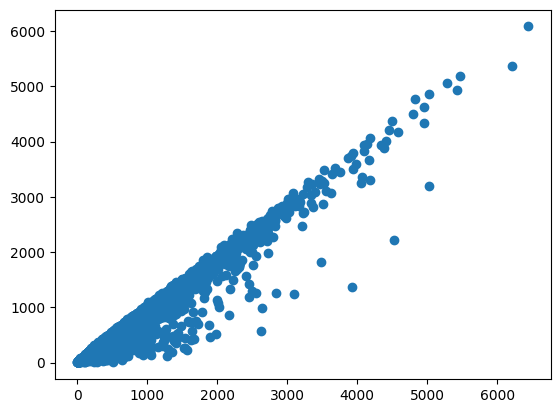

In [17]:
import matplotlib.pyplot as plt 
plt.scatter(house_df['total_bedrooms'], house_df['households'])

##### adding a regression line:

<AxesSubplot: xlabel='total_bedrooms', ylabel='households'>

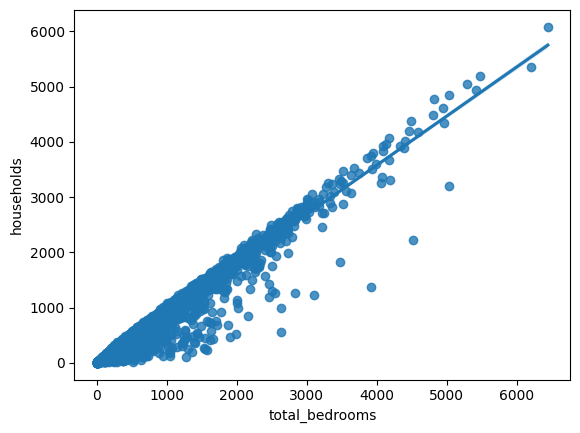

In [18]:
sns.regplot(data=house_df, x='total_bedrooms', y='households')

---
### <span style="color:blue"> Exercise:</span>
> Find a strong correlation in the above and vizualize it

---

<a id='section2'></a>

### 2. Scatterplot matrix

The diagonal shows the distribution of the three numeric variables.

In the other cells of the plot matrix, we have the scatterplots of each variable combination in the dataframe. 

In [20]:
features = ['median_house_value', 'housing_median_age',
            'median_income']

In [21]:
house_df[features]

,median_house_value,housing_median_age,median_income
0,452600.0,41.0,8.3252
1,358500.0,21.0,8.3014
2,352100.0,52.0,7.2574
3,341300.0,52.0,5.6431
4,342200.0,52.0,3.8462
...,...,...,...
20635,78100.0,25.0,1.5603
20636,77100.0,18.0,2.5568
20637,92300.0,17.0,1.7000
20638,84700.0,18.0,1.8672


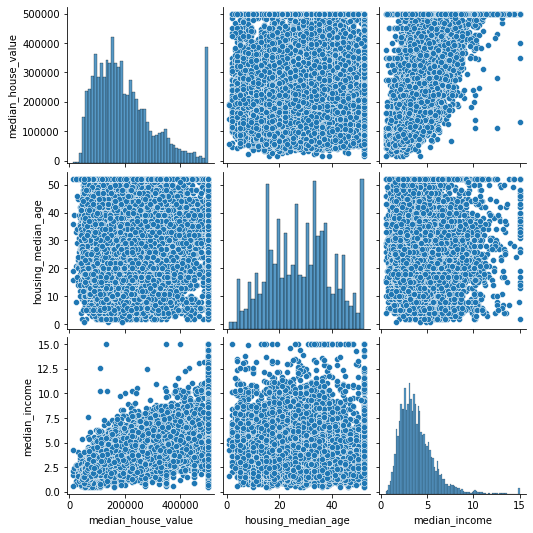

In [42]:
#sns.set()
sns.pairplot(house_df[features], height = 2.5)

<a id='section3'></a>

Remember our Dino data?

In [22]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/DatasaurusDozen.tsv'

In [23]:
df = pd.read_csv(url, sep='\t')

Add a regression line:

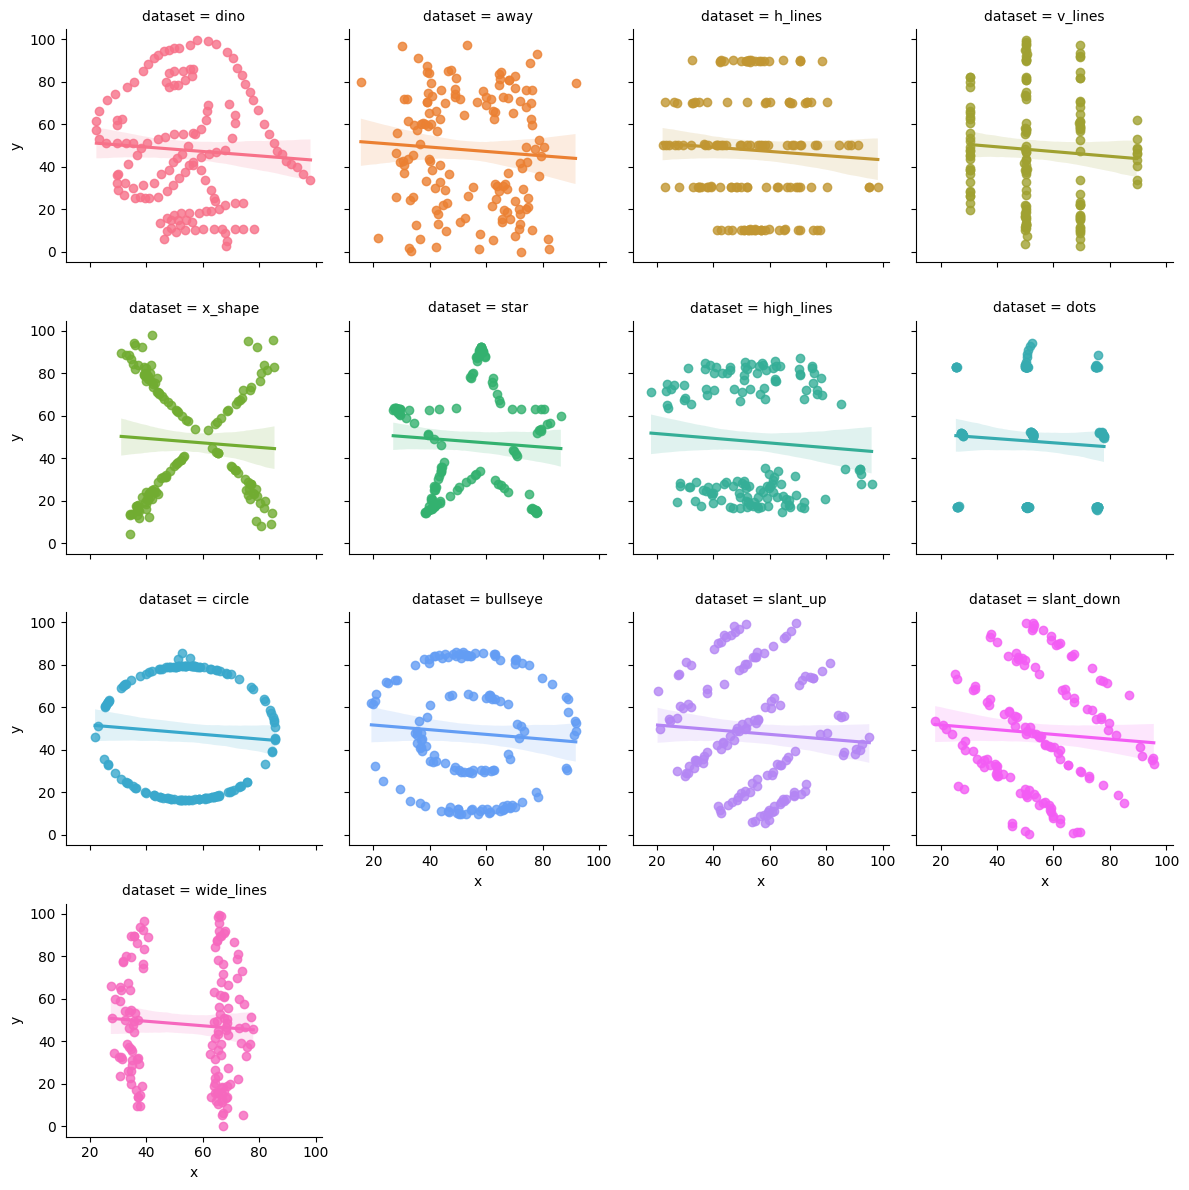

In [24]:
df_grid = sns.FacetGrid(df, col="dataset", hue="dataset", col_wrap=4)
df_grid.map_dataframe(sns.regplot, x="x", y="y")

Try the different correlation options - is there a difference?

In [9]:
df.groupby('dataset').corr(method = 'pearson')
#df.groupby('dataset').corr(method = 'spearman')
#df.groupby('dataset').corr(method = 'kendall')

x         y
dataset                         
away       x  1.000000 -0.064128
           y -0.064128  1.000000
bullseye   x  1.000000 -0.068586
           y -0.068586  1.000000
circle     x  1.000000 -0.068343
           y -0.068343  1.000000
dino       x  1.000000 -0.064472
           y -0.064472  1.000000
dots       x  1.000000 -0.060341
           y -0.060341  1.000000
h_lines    x  1.000000 -0.061715
           y -0.061715  1.000000
high_lines x  1.000000 -0.068504
           y -0.068504  1.000000
slant_down x  1.000000 -0.068980
           y -0.068980  1.000000
slant_up   x  1.000000 -0.068609
           y -0.068609  1.000000
star       x  1.000000 -0.062961
           y -0.062961  1.000000
v_lines    x  1.000000 -0.069446
           y -0.069446  1.000000
wide_lines x  1.000000 -0.066575
           y -0.066575  1.000000
x_shape    x  1.000000 -0.065583
           y -0.065583  1.000000

### 3. Heatmaps

In [47]:
features = ['median_house_value', 'housing_median_age','median_income','total_bedrooms','population']

In [49]:
correlation_matrix = house_df[features].corr().round(2)
correlation_matrix

,median_house_value,housing_median_age,median_income,total_bedrooms,population
median_house_value,1.00,0.11,0.69,0.05,-0.02
housing_median_age,0.11,1.00,-0.12,-0.32,-0.30
median_income,0.69,-0.12,1.00,-0.01,0.00
total_bedrooms,0.05,-0.32,-0.01,1.00,0.88
population,-0.02,-0.30,0.00,0.88,1.00


<AxesSubplot:>

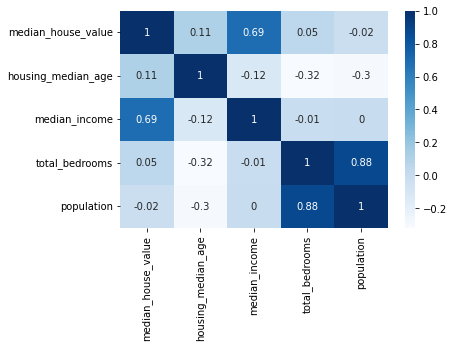

In [52]:
sns.heatmap(data=correlation_matrix,cmap='Blues', annot=True)

---
### <span style="color:blue"> Exercise:</span>
> What happens if `annot=False`? \
> Use another color for the heatmap. You can run the command: `plt.colormaps()` to see all available colors

---
> ##### Summary
>
>* `.corr` - compute pairwise correlation of columns, excluding NA/null values. [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
>
>* `.corr.style.background_gradient` - change the background color. [various options](corr.style.background_gradient)
>
>* `.plotting.scatter_matrix` - draw a matrix of scatter plots. [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html?highlight=scatter_matrix)
>
>* `.plot.scatter` - plot a scatter plot
>
> Seaborn package:
>
>* `sns.scatterplot` - a scatter plot
>
>* `sns.regplot` - a scatter plot with a regression line
>
>* `sns.pairplot` - scatter plot matrix
>
> * `sns.heatmap` - a heatmap. @annot = True to print the values inside the square
>
---